This is a notebook that I'm using as a "final project" for Think Stats.
The idea is to try some of the stuff I learned while reading the book using some dataset.

The dataset I'm using here is **Medical Cost Personal Datasets** available at https://www.kaggle.com/mirichoi0218/insurance

In [41]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# a quick overview of the data
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Available fields:

    * sex (category/bool): male/female
    * bmi (numeric): body mass index computed as kg / (m^2). The expected value should be between 18.5 and 24.9.
    * children (count): number of children covered in the insurance
    * smoker (bool): does the person smoke?
    * region (category): northeast, southeast, southwest, northwest
    * charges (numeric): medical costs billed by health insurance

Some ideas from the data description:
    
    * age: min = 18 and max = 64. Mean = Median = 39
    * sex: most of the respondants are male
    * bmi: min = 15.96 and max = 53.13 (almost twice the expected value). Mean = Mean = 30
    * children: on average, one children per person. min = 0 and max = 5
    * smoker: most of the respondants are non-smokers
    * region: most of the respondants live in the southeast region

Some basic questions:
    
    * Does the region influence in costs?
    * How much does age, sex, bmi, children and smoker influence in costs?
    * Is it possible to predict the costs given some variables?

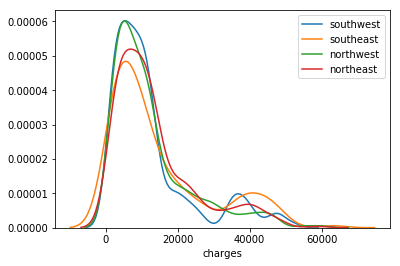

In [40]:
(fig, ax) = plt.subplots()

for region in data.region.unique():
    sns.distplot(data[data.region == region].charges, bins=15, ax=ax, hist=False, label=region)
    
plt.legend()

The above KDE estimates of the charges' distributions shows that the data is skewed to the left, around 10k, with a second peak around 35k.

All regions follow the "same" pattern.

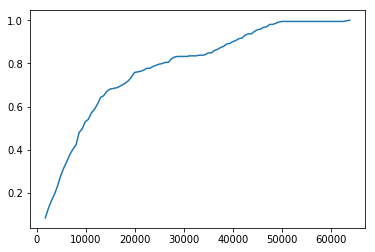

In [44]:
(counts, bin_edges) = np.histogram(data[data.region == 'southeast'].charges, bins=100)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf / cdf[-1])